In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
diamonds_df = pd.read_csv('noisy_datasets/diamond.csv')
print(diamonds_df.head())
diamonds_df = diamonds_df.drop(columns=['Unnamed: 0'])
print('Dropping column \"Unnamed: 0\" since it is jut indexing')

  Unnamed: 0 carat      cut color clarity  average us salary  \
0          1  0.23    Ideal     E     SI2              31282   
1          2  0.21  Premium     E     SI1              40049   
2          3  0.23     Good     E     VS1              33517   
3          4  0.29  Premium     I     VS2              38495   
4          5  0.31     Good     J     SI2              34178   

   number of diamonds mined (millions) depth table price     x     y     z  
0                                 5.01  61.5    55   326  3.95  3.98  2.43  
1                                 1.69  59.8    61   326  3.89  3.84  2.31  
2                                 3.85  56.9    65   327  4.05  4.07  2.31  
3                                 3.49  62.4    58   334   4.2  4.23  2.63  
4                                 4.70  63.3    58   335  4.34  4.35  2.75  
Dropping column "Unnamed: 0" since it is jut indexing


In [100]:
diamonds_df = pd.read_csv('noisy_datasets/diamond.csv')
diamonds_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           53563 non-null  object 
 1   carat                                52430 non-null  object 
 2   cut                                  52647 non-null  object 
 3   color                                52428 non-null  object 
 4   clarity                              53587 non-null  object 
 5   average us salary                    53940 non-null  int64  
 6   number of diamonds mined (millions)  53940 non-null  float64
 7   depth                                53246 non-null  object 
 8   table                                52398 non-null  object 
 9   price                                52357 non-null  object 
 10  x                                    52414 non-null  object 
 11  y                           

In [101]:
diamonds_df = diamonds_df.drop(columns=['Unnamed: 0'], errors='ignore')
print("Dropped Unnamed: 0 as it is only indexing")
print(diamonds_df.info())
for cols in diamonds_df.columns:
        if cols in ['depth', 'table', 'price', 'carat', 'x', 'y', 'z']:
            diamonds_df[cols] = pd.to_numeric(diamonds_df[cols], errors = 'coerce')
            diamonds_df[cols] = diamonds_df[cols].fillna(diamonds_df[cols].median())
            Q1 = diamonds_df[cols].quantile(0.25)
            Q3 = diamonds_df[cols].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR    
            diamonds_df = diamonds_df[(diamonds_df[cols] >= lower_bound) & (diamonds_df[cols] <= upper_bound)]
        if cols in ['cut', 'color', 'clarity']:
            diamonds_df.dropna(subset=[cols], inplace=True)
            diamonds_df[cols] = diamonds_df[cols].str.lower()
            diamonds_df[cols] = pd.Categorical(diamonds_df[cols]).codes



Dropped Unnamed: 0 as it is only indexing
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   carat                                52430 non-null  object 
 1   cut                                  52647 non-null  object 
 2   color                                52428 non-null  object 
 3   clarity                              53587 non-null  object 
 4   average us salary                    53940 non-null  int64  
 5   number of diamonds mined (millions)  53940 non-null  float64
 6   depth                                53246 non-null  object 
 7   table                                52398 non-null  object 
 8   price                                52357 non-null  object 
 9   x                                    52414 non-null  object 
 10  y                                    52719 non-null 

In [102]:
print(diamonds_df.isnull().sum())

carat                                  0
cut                                    0
color                                  0
clarity                                0
average us salary                      0
number of diamonds mined (millions)    0
depth                                  0
table                                  0
price                                  0
x                                      0
y                                      0
z                                      0
dtype: int64



Training model with Random initialization:
Running for fixed iterations:
Iteration 0: Loss is 0.6628326890531899
Iteration 1000: Loss is 0.11638064538707585
Iteration 2000: Loss is 0.10073649562279609
Iteration 3000: Loss is 0.08811955217707733
Iteration 4000: Loss is 0.07747652802064942
Iteration 5000: Loss is 0.06847210919251451
Iteration 6000: Loss is 0.060841603487928005
Iteration 7000: Loss is 0.054363284632875236
Iteration 8000: Loss is 0.04883368681795984
Iteration 9000: Loss is 0.044094023549133186
Iteration 10000: Loss is 0.04001493652708219
Iteration 11000: Loss is 0.0364892296448821
Iteration 12000: Loss is 0.03342817932750616
Iteration 13000: Loss is 0.030758107456057445
Iteration 14000: Loss is 0.028561807282463814
Iteration 15000: Loss is 0.026885147669276355
Iteration 16000: Loss is 0.025438994936631352
Iteration 17000: Loss is 0.024188368446537663
Iteration 18000: Loss is 0.02310368894453746
Iteration 19000: Loss is 0.022160340285590878
Iteration 20000: Loss is 0.02133

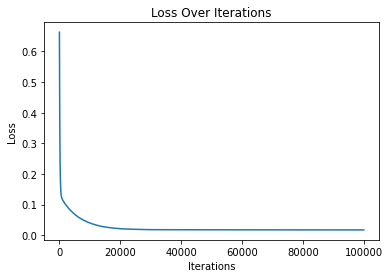

Plotting Actual vs Predicted for fixed iterations:


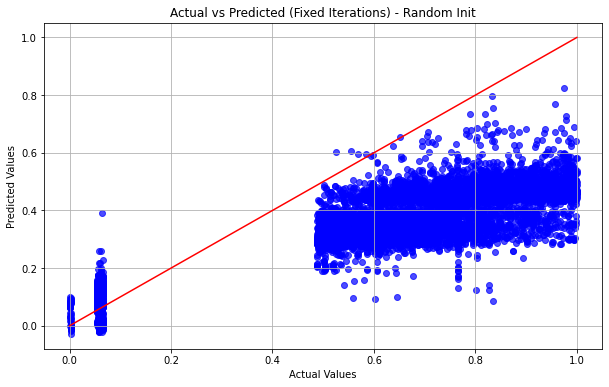

Running with gradient threshold stopping criteria:
Iteration 0: Loss is 0.19273450046486598
Iteration 1000: Loss is 0.1621264182371788
Iteration 2000: Loss is 0.14309182322681802
Iteration 3000: Loss is 0.1267167646499887
Iteration 4000: Loss is 0.11266964602840664
Iteration 5000: Loss is 0.10062046799528856
Iteration 6000: Loss is 0.09016923797798193
Iteration 7000: Loss is 0.08108845983664438
Iteration 8000: Loss is 0.0731842339160817
Iteration 9000: Loss is 0.06629115867396368
Iteration 10000: Loss is 0.060268184140875265
Iteration 11000: Loss is 0.05499437547639216
Iteration 12000: Loss is 0.05044697214580942
Iteration 13000: Loss is 0.0464873591299886
Iteration 14000: Loss is 0.04298157243188673
Iteration 15000: Loss is 0.039870800230362796
Iteration 16000: Loss is 0.03710390220034224
Iteration 17000: Loss is 0.03463650603111189
Iteration 18000: Loss is 0.03243031345024804
Iteration 19000: Loss is 0.030451959029865937
Iteration 20000: Loss is 0.028672782080286553
Iteration 21000: 

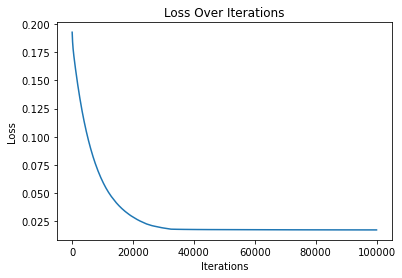

Plotting Actual vs Predicted for gradient threshold:


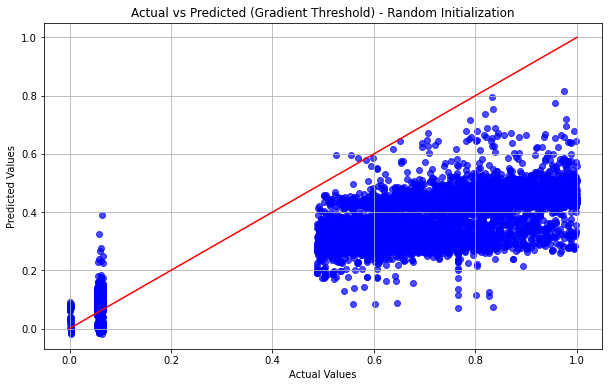


Training model with Zero initialization:
Running for fixed iterations:
Iteration 0: Loss is 0.07205835170685876
Iteration 1000: Loss is 0.028477735036837728
Iteration 2000: Loss is 0.02516762484653016
Iteration 3000: Loss is 0.022702289160207525
Iteration 4000: Loss is 0.0210134977082766
Iteration 5000: Loss is 0.019993899355479756
Iteration 6000: Loss is 0.019476408886349498
Iteration 7000: Loss is 0.01907627726771554
Iteration 8000: Loss is 0.018752364146187566
Iteration 9000: Loss is 0.018489075649674624
Iteration 10000: Loss is 0.01827549644985436
Iteration 11000: Loss is 0.018101569109704046
Iteration 12000: Loss is 0.017960451562187434
Iteration 13000: Loss is 0.017845086351524903
Iteration 14000: Loss is 0.01775128889828714
Iteration 15000: Loss is 0.017674445923126437
Iteration 16000: Loss is 0.017612026188568664
Iteration 17000: Loss is 0.01756050866031347
Iteration 18000: Loss is 0.01751832803490373
Iteration 19000: Loss is 0.017483484338816146
Iteration 20000: Loss is 0.017

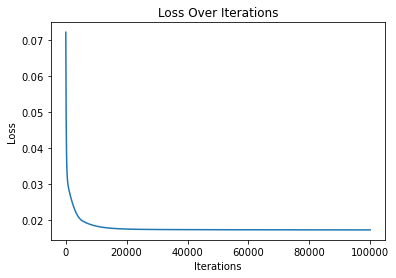

Plotting Actual vs Predicted for fixed iterations:


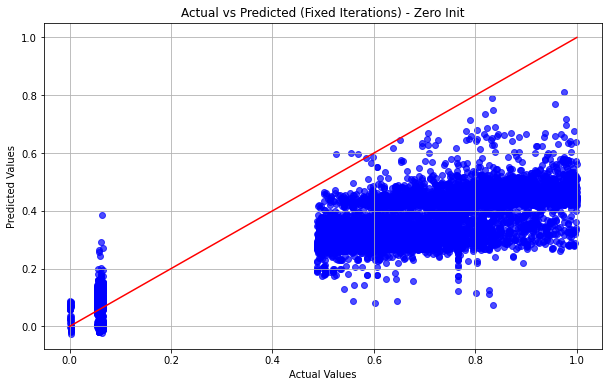

Running with gradient threshold stopping criteria:
Iteration 0: Loss is 0.07205835170685876
Iteration 1000: Loss is 0.028477735036837728
Iteration 2000: Loss is 0.02516762484653016
Iteration 3000: Loss is 0.022702289160207525
Iteration 4000: Loss is 0.0210134977082766
Iteration 5000: Loss is 0.019993899355479756
Iteration 6000: Loss is 0.019476408886349498
Iteration 7000: Loss is 0.01907627726771554
Iteration 8000: Loss is 0.018752364146187566
Iteration 9000: Loss is 0.018489075649674624
Iteration 10000: Loss is 0.01827549644985436
Iteration 11000: Loss is 0.018101569109704046
Iteration 12000: Loss is 0.017960451562187434
Iteration 13000: Loss is 0.017845086351524903
Iteration 14000: Loss is 0.01775128889828714
Iteration 15000: Loss is 0.017674445923126437
Iteration 16000: Loss is 0.017612026188568664
Iteration 17000: Loss is 0.01756050866031347
Iteration 18000: Loss is 0.01751832803490373
Iteration 19000: Loss is 0.017483484338816146
Iteration 20000: Loss is 0.017454784767097956
Itera

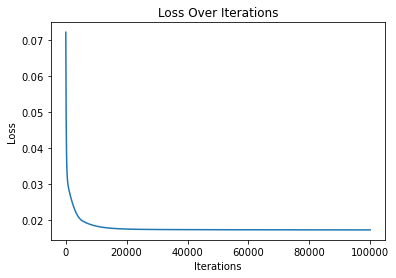

Plotting Actual vs Predicted for gradient threshold:


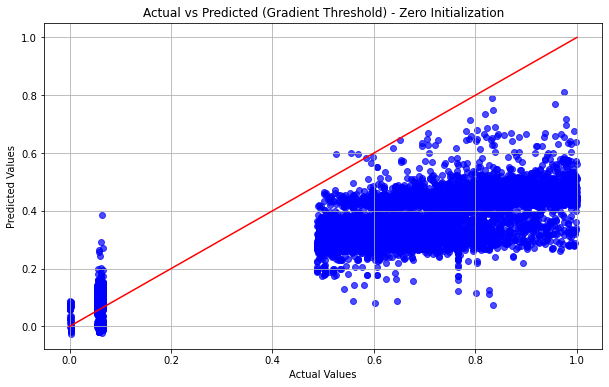


Training model with Xavier initialization:
Running for fixed iterations:
Iteration 0: Loss is 0.4978331881270553
Iteration 1000: Loss is 0.08458510761438053
Iteration 2000: Loss is 0.07300707822331798
Iteration 3000: Loss is 0.0636917896868195
Iteration 4000: Loss is 0.055948055947281805
Iteration 5000: Loss is 0.049481233193200275
Iteration 6000: Loss is 0.04405837847522871
Iteration 7000: Loss is 0.03949347981347405
Iteration 8000: Loss is 0.03563695868504196
Iteration 9000: Loss is 0.03236807864736472
Iteration 10000: Loss is 0.029754154095785502
Iteration 11000: Loss is 0.027697093990514798
Iteration 12000: Loss is 0.025914389430128904
Iteration 13000: Loss is 0.024366816993858634
Iteration 14000: Loss is 0.02302204921922447
Iteration 15000: Loss is 0.0218526654530292
Iteration 16000: Loss is 0.020834824509231062
Iteration 17000: Loss is 0.019988237711212827
Iteration 18000: Loss is 0.019368825851703804
Iteration 19000: Loss is 0.018821457807607203
Iteration 20000: Loss is 0.01833

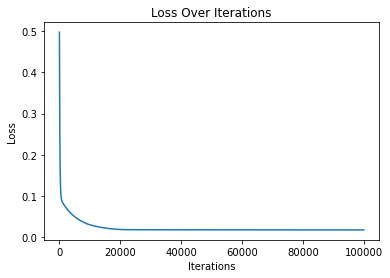

Plotting Actual vs Predicted for fixed iterations:


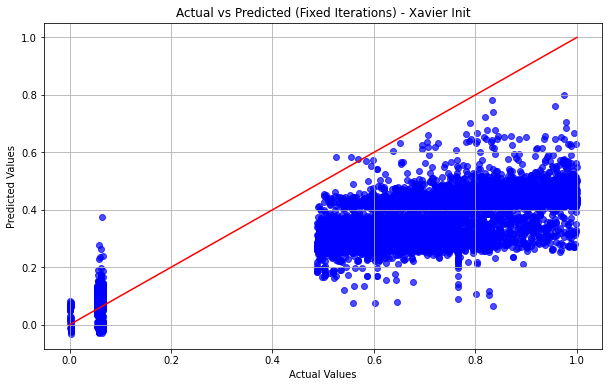

Running with gradient threshold stopping criteria:
Iteration 0: Loss is 0.7033292633845262
Iteration 1000: Loss is 0.09200951658630095
Iteration 2000: Loss is 0.08015660146577236
Iteration 3000: Loss is 0.07051982845141053
Iteration 4000: Loss is 0.06275393899569139
Iteration 5000: Loss is 0.056493622237908075
Iteration 6000: Loss is 0.05104332179039945
Iteration 7000: Loss is 0.046271933443936895
Iteration 8000: Loss is 0.04207284453256191
Iteration 9000: Loss is 0.038512665536197185
Iteration 10000: Loss is 0.03543231242180263
Iteration 11000: Loss is 0.03266961128034291
Iteration 12000: Loss is 0.030180985408765452
Iteration 13000: Loss is 0.02792992464245877
Iteration 14000: Loss is 0.025930930633328866
Iteration 15000: Loss is 0.024275523965840005
Iteration 16000: Loss is 0.02295737684725725
Iteration 17000: Loss is 0.02210569588868044
Iteration 18000: Loss is 0.021537936326799234
Iteration 19000: Loss is 0.021103148672555246
Iteration 20000: Loss is 0.020713875190507325
Iteration

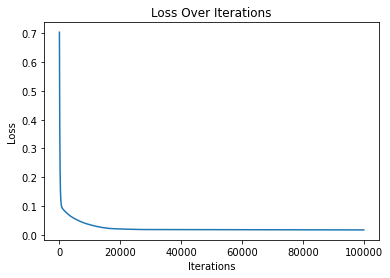

Plotting Actual vs Predicted for gradient threshold:


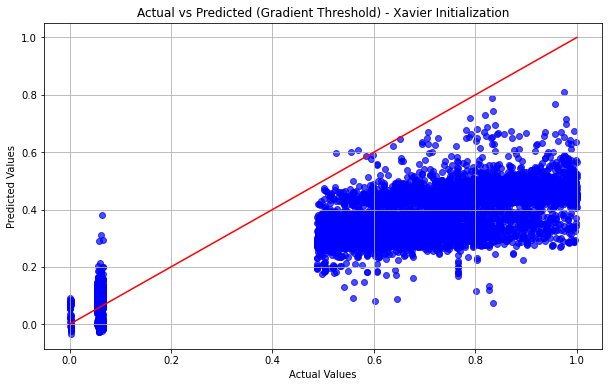


Best performing method: Random initialization with Fixed Iterations stopping criteria.
Lowest MSE: 0.01334


In [103]:
X = diamonds_df.drop(columns=['price']).values
Y = diamonds_df['price'].values.reshape(-1, 1)
N = X.shape[0]
train_size = int(0.8 * N)
index_number = np.arange(N)
np.random.shuffle(index_number)
train_indices = index_number[:train_size]
test_indices = index_number[train_size:]
X_train = X[:train_size]
Y_train = Y[:train_size]
X_test = X[train_size:]
Y_test = Y[train_size:]

min_values_x = X_train.min(axis=0)
max_values_x = X_train.max(axis=0)
min_values_xt = X_test.min(axis=0)
max_values_xt = X_test.max(axis=0)
min_values_y = Y_train.min(axis = 0)
max_values_y = Y_train.max(axis = 0)
min_values_yt = Y_test.min(axis = 0)
max_values_yt = Y_test.max(axis = 0)
X_train_normalized = (X_train - min_values_x) / (max_values_x - min_values_x)
X_test_normalized = (X_test - min_values_xt) / (max_values_xt - min_values_xt)
Y_train_normalized = (Y_train - min_values_y) / (max_values_y - min_values_y)
Y_test_normalized = (Y_test - min_values_yt) / (max_values_yt - min_values_yt)



class ElasticNetRegression:
    def __init__(self, learning_rate, iterations, lambda1, lambda2, threshold=None):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.lambda1 = lambda1  
        self.lambda2 = lambda2  
        self.weights = None
        self.loss_history = []
        self.bias = 0
        self.threshold = threshold  

    def initialize_weights(self, method='Random', input_dim=None):
        if method == 'Random':
            self.weights = np.random.uniform(-1, 1, (input_dim, 1))
        elif method == 'Zero':
            self.weights = np.zeros((input_dim, 1))
        elif method == 'Xavier':
            limit = np.sqrt(6 / (input_dim + 1)) 
            self.weights = np.random.uniform(-limit, limit, (input_dim, 1))
        else:
            raise ValueError("Unknown weight initialization method.")

    def cost(self, y, y_pred):
        N = len(y)
        mse = (1 / (2 * N)) * np.sum((y_pred - y) ** 2) 
        l1_penalty = self.lambda1 * np.sum(np.abs(self.weights))
        l2_penalty = (self.lambda2 / 2) * np.sum(self.weights ** 2)
        return mse + l1_penalty + l2_penalty

    def gradient(self, X, y):
        N = len(y)
        y_pred = np.dot(X, self.weights) + self.bias
        residual = y_pred - y
        dW = (1 / N) * np.dot(X.T, residual) + self.lambda1 * np.sign(self.weights) + self.lambda2 * self.weights
        db = np.sum(residual) / N
        return dW, db

    def fit(self, X, y, init_method):
        self.initialize_weights(method=init_method, input_dim=X.shape[1])
        
        for i in range(self.iterations):
            dW, db = self.gradient(X, y)
            self.weights -= self.learning_rate * dW
            self.bias -= self.learning_rate * db
            
            cost_value = self.cost(y, np.dot(X, self.weights) + self.bias)
            self.loss_history.append(cost_value)
            if self.threshold and np.linalg.norm(dW) < self.threshold:
                print(f"Stopping early at iteration {i} due to small gradient. Final Loss: {cost_value}")
                break

            if i % 1000 == 0:
                print(f"Iteration {i}: Loss is {cost_value}")

        print(f"Completed all iterations. Final Loss: {cost_value}")

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def plot_loss(self):
        plt.plot(range(len(self.loss_history)), self.loss_history)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Loss Over Iterations')
        plt.show()

def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6)) 
    plt.scatter(y_true, y_pred, alpha=0.7, color='blue')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()],color='red', linestyle='-')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.grid()
    plt.show()

# Hyperparameters
learning_rate = 0.001 
iterations_count = 100000 
lambda1 = 0.01  
lambda2 = 0.01  
threshold = 0.01  
initialization_methods = ['Random', 'Zero', 'Xavier']


best_mse = float('inf')
best_method = None
best_criteria = None


for init_method in initialization_methods:
    print(f"\nTraining model with {init_method} initialization:")
    print("Running for fixed iterations:")
    model_fixed_iterations = ElasticNetRegression(learning_rate, iterations_count, lambda1, lambda2)
    model_fixed_iterations.fit(X_train_normalized, Y_train_normalized, init_method=init_method)
    y_test_pred_normalized_fixed = model_fixed_iterations.predict(X_test_normalized)
    mse_fixed_normalized = (1 / (2 * len(Y_train_normalized))) * np.sum((Y_test_normalized - y_test_pred_normalized_fixed) ** 2)
    print(f"Test MSE (Fixed Iterations): {mse_fixed_normalized:.5f}")
    print("Loss plot for fixed iterations:")
    model_fixed_iterations.plot_loss()
    print("Plotting Actual vs Predicted for fixed iterations:")
    plot_actual_vs_predicted(Y_test_normalized, y_test_pred_normalized_fixed, f'Actual vs Predicted (Fixed Iterations) - {init_method} Init')
    if mse_fixed_normalized < best_mse:
        best_mse = mse_fixed_normalized
        best_method = init_method
        best_criteria = "Fixed Iterations"
    print("Running with gradient threshold stopping criteria:")
    model_gradient_threshold = ElasticNetRegression(learning_rate, iterations_count, lambda1, lambda2, threshold=threshold)
    model_gradient_threshold.fit(X_train_normalized, Y_train_normalized, init_method=init_method)
    
    y_test_pred_normalized_threshold = model_gradient_threshold.predict(X_test_normalized)
    mse_threshold_normalized = (1 / (2 * len(Y_test_normalized))) * np.sum((Y_test_normalized - y_test_pred_normalized_threshold) ** 2)
    print(f"Test MSE (Gradient Threshold): {mse_threshold_normalized:.5f}")
    print("Loss plot for gradient threshold:")
    model_gradient_threshold.plot_loss()
    print("Plotting Actual vs Predicted for gradient threshold:")
    plot_actual_vs_predicted(Y_test_normalized, y_test_pred_normalized_threshold, f'Actual vs Predicted (Gradient Threshold) - {init_method} Initialization')
    if mse_threshold_normalized < best_mse:
        best_mse = mse_threshold_normalized
        best_method = init_method
        best_criteria = "Gradient Threshold"
print(f"\nBest performing method: {best_method} initialization with {best_criteria} stopping criteria.")
print(f"Lowest MSE: {best_mse:.5f}")